# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W ninejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [55]:
import sys
import math
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, data: list):
        self.data = data

    def mode(self):
        return math.sqrt(sum([self.data[i]**2 for i in range(len(self.data))]))

    def __add__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] + other.data[i] for i in range(len(self.data))])

    def __sub__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] - other.data[i] for i in range(len(self.data))])

    def __str__(self):
        return str(self.data)

    def __repr__(self):
        return f'<{self.__class__.__name__}({self.data}) at {hex(id(self))}>'

    def __eq__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] == other.data[i] for i in range(len(self.data))])

    def __ge__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] >= other.data[i] for i in range(len(self.data))])

    def __le__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] <= other.data[i] for i in range(len(self.data))])

    def __gt__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] > other.data[i] for i in range(len(self.data))])

    def __lt__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] < other.data[i] for i in range(len(self.data))])

    def __ne__(self, other):
        if len(self.data) != len(other.data):
            raise ArithmeticError()
        return Vector([self.data[i] != other.data[i] for i in range(len(self.data))])

    def arrow(self):
        if len(self.data) != 2:
            raise ValueError()
        plt.arrow(0,0, self.data[0], self.data[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.show()

    def __hash__(self):
        return hash(str(self.data))

    def __mul__(self, other):
        if not isinstance(other, (int, float)):
            raise ValueError()
        return Vector([self.data[i] * other for i in range(len(self.data))])

    def __truediv__(self, other):
        if not isinstance(other, (int, float)):
            raise TypeError()
        if other == 0:
            raise ArithmeticError()
        return Vector([self.data[i] / other for i in range(len(self.data))])

In [56]:
test = Vector([1,2])
test2 = Vector([3,4])
test3 = Vector([5,6,7])
print(test)
print(repr(test2))
print(test.mode())
print(test + test2)
print(test - test2)
print(test + test3)


[1, 2]
<Vector([3, 4]) at 0x1b1bcf68850>
2.23606797749979
[4, 6]
[-2, -2]


ArithmeticError: 

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów (ich modułów) za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [57]:
a = Vector([1, 2, 3])
b = Vector([3, 2, 1])
repr(a <= b)
# Out [1]: <Vector([True, True, False]) at 140185575662832>

'<Vector([True, True, False]) at 0x1b1bcf682e0>'

### Zadanie 3

Do klasy `Vector` dopisz funkcję umożliwiającą wyświetlenie wektora na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

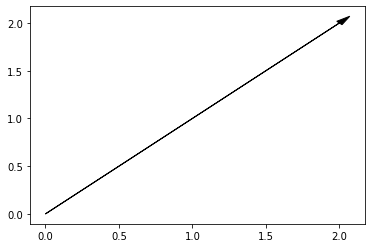

In [58]:
arr = Vector([2, 2])
arr.arrow()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [59]:
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]

'Wektor 2'

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [60]:
print(Vector([2,6]) / 0)
print(Vector([1,2]) * 2)

ArithmeticError: 